In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [5]:
cancer.head()

AttributeError: head

In [6]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))

In [7]:
# splitting Dependent and Independent Variable
X = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=432)

In [9]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
# Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
 

In [71]:
model = Sequential([
    Dense(units=19, input_dim = 30,activation='relu'),
    Dense(units=22,activation='relu'),
    Dropout(0.5),
    Dense(23,activation='relu'),
    Dense(20,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 19)                589       
_________________________________________________________________
dense_72 (Dense)             (None, 22)                440       
_________________________________________________________________
dropout_15 (Dropout)         (None, 22)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 23)                529       
_________________________________________________________________
dense_74 (Dense)             (None, 20)                480       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 21        
Total params: 2,059
Trainable params: 2,059
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=50)

Epoch 1/50
398/398 [==============================] - 1s 3ms/step - loss: 5.1424 - acc: 0.5578
Epoch 2/50
398/398 [==============================] - 0s 264us/step - loss: 4.7036 - acc: 0.6055
Epoch 3/50
398/398 [==============================] - 0s 224us/step - loss: 3.5492 - acc: 0.6357
Epoch 4/50
398/398 [==============================] - 0s 232us/step - loss: 2.2477 - acc: 0.6382
Epoch 5/50
398/398 [==============================] - 0s 565us/step - loss: 1.0299 - acc: 0.7111
Epoch 6/50
398/398 [==============================] - 0s 790us/step - loss: 0.6985 - acc: 0.7764
Epoch 7/50
398/398 [==============================] - 0s 803us/step - loss: 0.4472 - acc: 0.8417
Epoch 8/50
398/398 [==============================] - 0s 537us/step - loss: 0.5562 - acc: 0.8216
Epoch 9/50
398/398 [==============================] - 0s 509us/step - loss: 0.4015 - acc: 0.8518
Epoch 10/50
398/398 [==============================] - 0s 694us/step - loss: 0.4778 - acc: 0.8367
Epoch 11/50
398/398 [==========

In [74]:
score = model.evaluate(X_test, y_test)

171/171 [==============================] - 1s 3ms/step


In [75]:
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [77]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [78]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [79]:
print(cnf_matrix)

[[ 46  17]
 [  1 107]]


Confusion matrix, without normalization
[[ 46  17]
 [  1 107]]


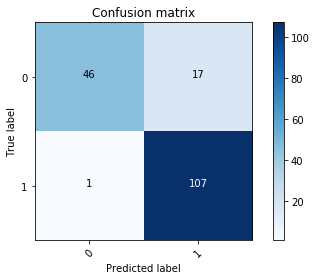

In [80]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])